In [1]:
import pandas as pd

DATA = '/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv'
TARGET = 'Diagnosis'

df = pd.read_csv(filepath_or_buffer=DATA, index_col=['PatientID']).drop(columns=['DoctorInCharge'])
for column in [TARGET, 'Gender',  'Smoking', 'MemoryComplaints', 'BehavioralProblems', 'Confusion',
                                     'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness',
                                     'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension']:
    df[column] = df[column] == 1
df = pd.get_dummies(data=df, columns=['Ethnicity', 'EducationLevel',])

df.head()

,Age,Gender,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,...,Forgetfulness,Diagnosis,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,EducationLevel_0,EducationLevel_1,EducationLevel_2,EducationLevel_3
PatientID,,,,,,,,,,,,,,,,,,,,,
4751,73,False,22.927749,False,13.297218,6.327112,1.347214,9.025679,False,False,...,False,False,True,False,False,False,False,False,True,False
4752,89,False,26.827681,False,4.542524,7.619885,0.518767,7.151293,False,False,...,True,False,True,False,False,False,True,False,False,False
4753,73,False,17.795882,False,19.555085,7.844988,1.826335,9.673574,True,False,...,False,False,False,False,False,True,False,True,False,False
4754,74,True,33.800817,True,12.209266,8.428001,7.435604,8.392554,False,False,...,False,False,True,False,False,False,False,True,False,False
4755,89,False,20.716974,False,18.454356,6.310461,0.795498,5.597238,False,False,...,False,False,True,False,False,False,True,False,False,False


Is our target class balanced?

In [2]:
df[TARGET].value_counts(normalize=True).to_dict()

{False: 0.6463471382038157, True: 0.35365286179618427}

In [3]:
COLUMNS = ['Age', 'Gender', 'BMI', 'Smoking', 'AlcoholConsumption',
       'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Ethnicity_0', 'Ethnicity_1',
       'Ethnicity_2', 'Ethnicity_3', 'EducationLevel_0', 'EducationLevel_1',
       'EducationLevel_2', 'EducationLevel_3']

In [4]:
import arrow
from umap import UMAP

time_start = arrow.now()
umap = UMAP(random_state=2024, verbose=True, n_jobs=1, low_memory=False, n_epochs=500)
df[['x', 'y']] = umap.fit_transform(X=df[COLUMNS])
print('done with UMAP in {}'.format(arrow.now() - time_start))

2024-08-01 18:28:02.536672: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-01 18:28:02.536801: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-01 18:28:02.700024: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


UMAP(low_memory=False, n_epochs=500, n_jobs=1, random_state=2024, verbose=True)
Thu Aug  1 18:28:14 2024 Construct fuzzy simplicial set
Thu Aug  1 18:28:16 2024 Finding Nearest Neighbors
Thu Aug  1 18:28:20 2024 Finished Nearest Neighbor Search
Thu Aug  1 18:28:24 2024 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Thu Aug  1 18:28:29 2024 Finished embedding
done with UMAP in 0:00:14.894849


In [5]:
import warnings
from plotly import express

warnings.filterwarnings(action='ignore', category=FutureWarning)
express.scatter(data_frame=df, x='x', y='y', color=TARGET, )

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df[COLUMNS], df[TARGET], test_size=0.2, random_state=2024, stratify=df[TARGET])
model = LogisticRegression(max_iter=10000, tol=1e-4).fit(X_train, y_train)
print('model fit in {} iterations'.format(model.n_iter_[0]))

print('accuracy: {:5.4f}'.format(accuracy_score(y_true=y_test, y_pred=model.predict(X=X_test))))

model fit in 4361 iterations
accuracy: 0.8163


In [7]:
from sklearn.metrics import classification_report

print(classification_report(zero_division=0 , y_true=y_test, y_pred=model.predict(X=X_test)))

              precision    recall  f1-score   support

       False       0.84      0.89      0.86       278
        True       0.77      0.68      0.72       152

    accuracy                           0.82       430
   macro avg       0.80      0.79      0.79       430
weighted avg       0.81      0.82      0.81       430



In [8]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5, random_state=2024).fit(X=X_train, y=y_train)
print(classification_report(zero_division=0 , y_true=y_test, y_pred=tree.predict(X=X_test)))

              precision    recall  f1-score   support

       False       0.97      0.95      0.96       278
        True       0.91      0.94      0.93       152

    accuracy                           0.95       430
   macro avg       0.94      0.95      0.94       430
weighted avg       0.95      0.95      0.95       430



[Text(0.5, 0.9166666666666666, 'x[21] <= 5.001\ngini = 0.457\nsamples = 1719\nvalue = [1111, 608]'),
 Text(0.2324561403508772, 0.75, 'x[20] <= 24.014\ngini = 0.496\nsamples = 860\nvalue = [392, 468]'),
 Text(0.09649122807017543, 0.5833333333333334, 'x[24] <= 5.148\ngini = 0.441\nsamples = 687\nvalue = [226, 461]'),
 Text(0.03508771929824561, 0.4166666666666667, 'x[6] <= 0.032\ngini = 0.074\nsamples = 365\nvalue = [14, 351]'),
 Text(0.017543859649122806, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.05263157894736842, 0.25, 'x[24] <= 4.696\ngini = 0.069\nsamples = 364\nvalue = [13, 351]'),
 Text(0.03508771929824561, 0.08333333333333333, 'gini = 0.051\nsamples = 344\nvalue = [9, 335]'),
 Text(0.07017543859649122, 0.08333333333333333, 'gini = 0.32\nsamples = 20\nvalue = [4, 16]'),
 Text(0.15789473684210525, 0.4166666666666667, 'x[22] <= 0.5\ngini = 0.45\nsamples = 322\nvalue = [212, 110]'),
 Text(0.12280701754385964, 0.25, 'x[23] <= 0.5\ngini = 0.317\nsamples = 263\nvalue = [2

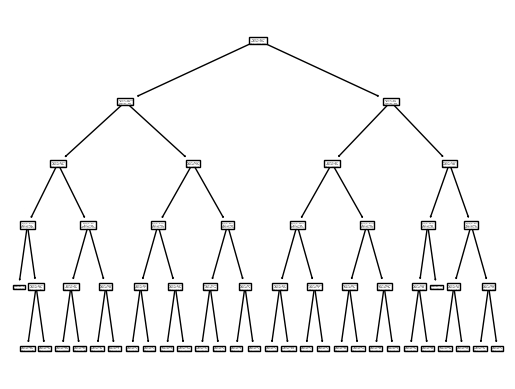

In [9]:
from sklearn.tree import plot_tree

plot_tree(decision_tree=tree)